In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import date
start = "2015-01-01"
end = date.today().strftime("%Y-%m-%d")
data = yf.download("TSLA", start=start, end=end)

C:\Users\FTT\AppData\Local\Temp\ipykernel_7412\1741675720.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [4]:

data = data.reset_index()
data.head(5)

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [5]:
data = data.drop(['Date'],axis=1)
data.head()

C:\Users\FTT\AppData\Local\Temp\ipykernel_7412\1106048037.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,14.620667,14.883333,14.217333,14.858000,71466000
1,14.006000,14.433333,13.810667,14.303333,80527500
2,14.085333,14.280000,13.614000,14.004000,93928500
3,14.063333,14.318667,13.985333,14.223333,44526000
4,14.041333,14.253333,14.000667,14.187333,51637500


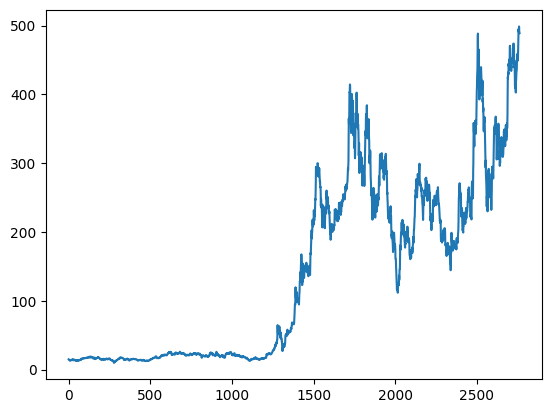

In [6]:
plt.plot(data['High'])

In [7]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2763.000000,2763.000000,2763.000000,2763.000000,2.763000e+03
mean,137.143804,140.184396,133.950245,137.163084,1.110492e+08
std,130.409022,133.336130,127.371394,130.486458,7.153927e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.840000,18.069667,17.538667,17.812000,6.777225e+07
50%,68.336670,68.498665,66.297997,67.456665,9.286500e+07
75%,240.820000,246.968338,236.315002,241.660004,1.284920e+08
max,489.880005,498.829987,485.329987,489.880005,9.140820e+08


In [8]:
ma100_day = data.High.rolling(100).mean()
ma100_day

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2758,413.909699
2759,415.684299
2760,417.510899
2761,419.298699


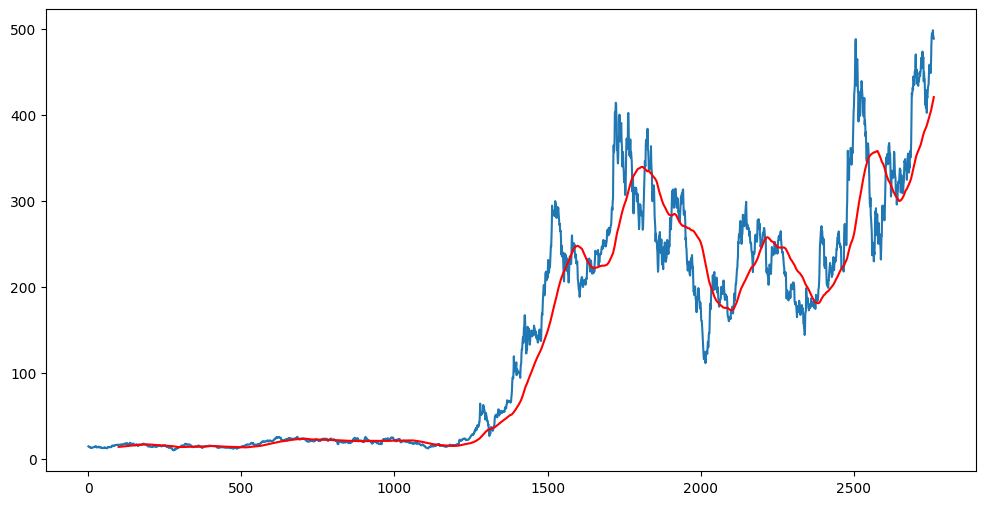

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.High)
plt.plot(ma100_day,color='r')

In [10]:
ma200_day = data.High.rolling(200).mean()

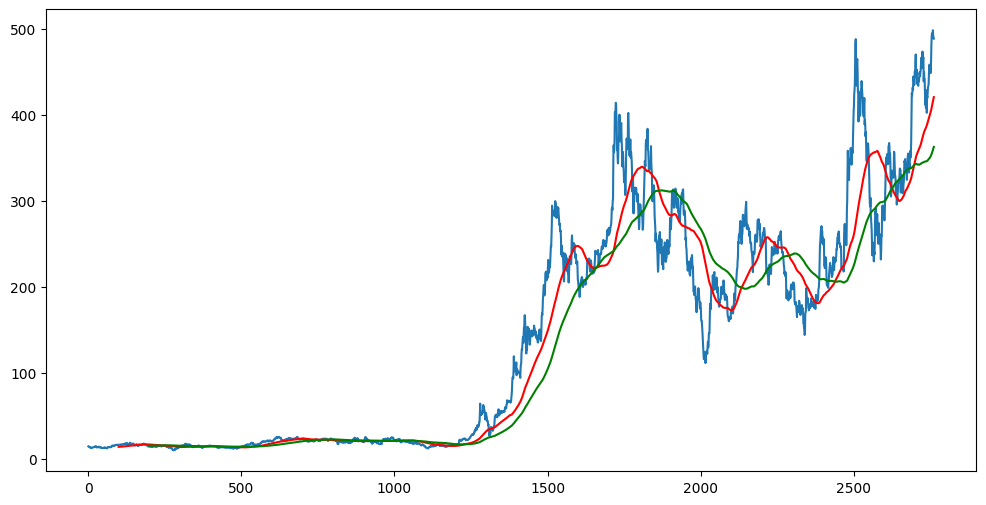

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data.High)
plt.plot(ma100_day,'r')
plt.plot(ma200_day,'g')

In [12]:
data.shape

(2763, 5)

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(2763, 5)

In [15]:
data_train = pd.DataFrame(data.High[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.High[int(len(data)*0.80):len(data)])

In [16]:
data_train.shape[0]

2210

In [17]:
data_test.shape[0]

553

In [42]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_train_scaler = scaler.fit_transform(data_train)
# from sklearn.preprocessing import MaxAbsScaler
# scaler = MaxAbsScaler()
# data_train_scaler = scaler.fit_transform(data_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaler = scaler.fit_transform(data_train)

In [43]:
data_train_scaler

array([[0.01126272],
       [0.01014931],
       [0.00976993],
       ...,
       [0.6398586 ],
       [0.63901737],
       [0.63112455]], shape=(2210, 1))

In [44]:
x_train = []
y_train = []

for i in range(100,data_train_scaler.shape[0]):
    x_train.append(data_train_scaler[i-100:i])
    y_train.append(data_train_scaler[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train

array([[[0.01126272],
        [0.01014931],
        [0.00976993],
        ...,
        [0.01544418],
        [0.016005  ],
        [0.01559263]],

       [[0.01014931],
        [0.00976993],
        [0.0098656 ],
        ...,
        [0.016005  ],
        [0.01559263],
        [0.01597201]],

       [[0.00976993],
        [0.0098656 ],
        [0.00970395],
        ...,
        [0.01559263],
        [0.01597201],
        [0.01614851]],

       ...,

       [[0.40619185],
        [0.41252588],
        [0.42462489],
        ...,
        [0.6266462 ],
        [0.62182141],
        [0.62110386]],

       [[0.41252588],
        [0.42462489],
        [0.44286003],
        ...,
        [0.62182141],
        [0.62110386],
        [0.6398586 ]],

       [[0.42462489],
        [0.44286003],
        [0.45186624],
        ...,
        [0.62110386],
        [0.6398586 ],
        [0.63901737]]], shape=(2110, 100, 1))

ML Model

In [46]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [47]:
model = Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences=True,
               input_shape = ((x_train.shape[1],1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




c:\Users\FTT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - loss: 0.0315
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - loss: 0.0062
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0066
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0057
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0058
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0051
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - loss: 0.0054
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0051
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0046
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0049
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0043
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0049
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [50]:
model.save('keras_model1.keras')

In [51]:
past_100_day = data_train.tail(100)

In [52]:
past_100_day

Ticker,TSLA
2110,189.320007
2111,192.960007
2112,184.220001
2113,186.779999
2114,198.600006
...,...
2205,261.649994
2206,261.359985
2207,268.940002
2208,268.600006


In [53]:
final_data = pd.concat([past_100_day,data_test],ignore_index=True)
final_data

Ticker,TSLA
0,189.320007
1,192.960007
2,184.220001
3,186.779999
4,198.600006
...,...
648,490.489990
649,498.829987
650,491.970001
651,490.899994


In [54]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.12664016],
       [0.13691133],
       [0.11224922],
       [0.11947289],
       [0.152826  ],
       [0.16941786],
       [0.16792234],
       [0.18442959],
       [0.20545162],
       [0.21685148],
       [0.21860099],
       [0.243771  ],
       [0.25618668],
       [0.30469257],
       [0.30060104],
       [0.32517846],
       [0.33051161],
       [0.32311864],
       [0.33623976],
       [0.36770226],
       [0.37402295],
       [0.34019019],
       [0.33299477],
       [0.32148198],
       [0.29896442],
       [0.32574285],
       [0.32816951],
       [0.33863827],
       [0.39450889],
       [0.3933802 ],
       [0.3824318 ],
       [0.38471741],
       [0.37551848],
       [0.3568385 ],
       [0.37269673],
       [0.38096452],
       [0.39747169],
       [0.41702648],
       [0.42557638],
       [0.43694803],
       [0.38514065],
       [0.34865544],
       [0.3538757 ],
       [0.362482  ],
       [0.34876834],
       [0.35184404],
       [0.34653913],
       [0.351

In [55]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [56]:
x_test

array([[[0.12664016],
        [0.13691133],
        [0.11224922],
        ...,
        [0.3513079 ],
        [0.35034851],
        [0.34134712]],

       [[0.13691133],
        [0.11224922],
        [0.11947289],
        ...,
        [0.35034851],
        [0.34134712],
        [0.32495276]],

       [[0.11224922],
        [0.11947289],
        [0.152826  ],
        ...,
        [0.34134712],
        [0.32495276],
        [0.31310138]],

       ...,

       [[0.46522194],
        [0.47315105],
        [0.47408227],
        ...,
        [0.97751065],
        [0.97646661],
        [1.        ]],

       [[0.47315105],
        [0.47408227],
        [0.49671268],
        ...,
        [0.97646661],
        [1.        ],
        [0.98064284]],

       [[0.47408227],
        [0.49671268],
        [0.50215864],
        ...,
        [1.        ],
        [0.98064284],
        [0.97762354]]], shape=(553, 100, 1))

In [57]:
y_pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


In [58]:
y_pred.shape

(553, 1)

In [59]:
scale_val = scaler.scale_
scale_val

array([0.00282175])

In [60]:
scaler_factor = 1/scale_val
y_pred = y_pred*scaler_factor
y_test = y_test*scaler_factor

In [61]:
y_pred.shape

(553, 1)

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2s)



MAE: 21.258332939144786
MSE: 725.9668870435715
RMSE: 26.943772695069477
R2 Score: 0.9160445905181465


Text(0, 0.5, 'Price')

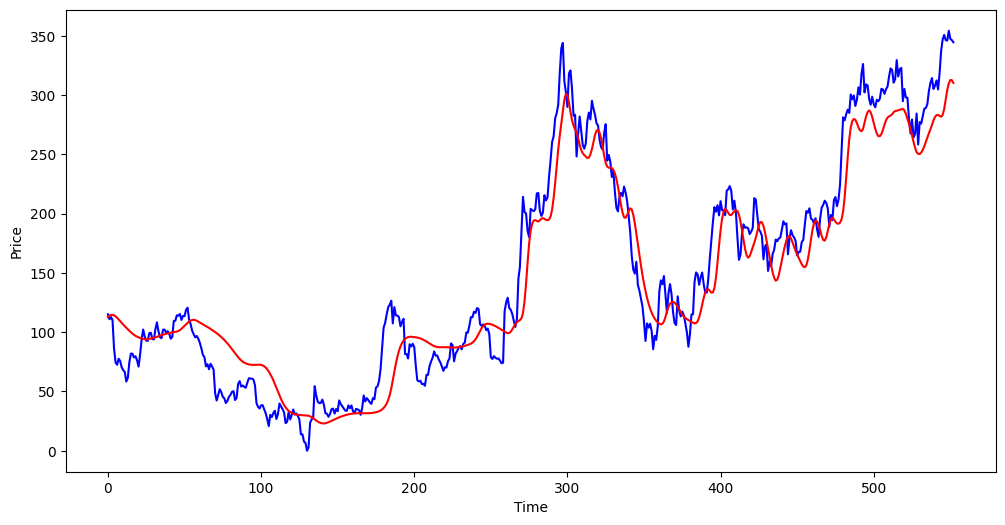

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='b',label="Original_price")
plt.plot(y_pred,color='r',label='Predicted_price')
plt.xlabel('Time')
plt.ylabel('Price')